In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df = pd.read_csv("evolutionary.csv")
df

,Gen Number,ID,Fitness,Weights
0,0,6,0.000034,"[-0.16404120364130415, 0.685501526070116, 0.05..."
1,0,7,0.000030,"[0.9465410350652583, 0.03410227197040472, -0.3..."
2,0,10,0.000025,"[0.21745511819155028, 0.04119066021921847, 0.9..."
3,0,8,0.000020,"[0.4276412056239227, 0.24048943737896789, -0.2..."
4,0,5,0.000015,"[-0.2149763633527697, -0.3077721576229857, -0...."
...,...,...,...,...
7995,799,3998,0.514904,"[0.9814004735401975, 0.10575782268276583, 0.16..."
7996,799,3992,0.514237,"[0.9814004735401975, 0.10575782157665076, 0.16..."
7997,799,3989,0.510396,"[0.9814004735401975, 0.10575782611657804, 0.16..."
7998,799,4004,0.000027,"[0.9814004735401975, 0.10575781938962389, 0.16..."


In [32]:
max_per_gen = df.groupby("Gen Number", group_keys=False).apply(
    lambda group: group[group["Fitness"] == group["Fitness"].max()],
    include_groups=False
).reset_index()

mean_per_gen = df.groupby("Gen Number", group_keys=False).apply(
    lambda group: group.assign(Fitness=group["Fitness"].mean()),
    include_groups=False
).reset_index()
mean_per_gen = mean_per_gen.iloc[::10].reset_index(drop=True)

In [33]:
mean_per_gen

,index,ID,Fitness,Weights
0,0,6,0.000019,"[-0.16404120364130415, 0.685501526070116, 0.05..."
1,10,12,0.019558,"[0.8586308899457773, 0.03495696032083734, -0.1..."
2,20,12,0.028423,"[0.8586308899457773, 0.03495696032083734, -0.1..."
3,30,12,0.058689,"[0.8586308899457773, 0.03495696032083734, -0.1..."
4,40,12,0.085427,"[0.8586308899457773, 0.03495696032083734, -0.1..."
...,...,...,...,...
795,7950,3984,0.401932,"[0.9814004735401975, 0.10575782440805244, 0.16..."
796,7960,3990,0.452832,"[0.9814004735401975, 0.10575782904306053, 0.16..."
797,7970,3985,0.445272,"[0.9814004735401975, 0.10575782416001463, 0.16..."
798,7980,3998,0.369339,"[0.9814004735401975, 0.10575782268276583, 0.16..."


In [34]:
def plot_graph(x_values, y_values, title):
    # Optional: set a nice style
    plt.style.use("tableau-colorblind10")  # or 'ggplot', 'bmh', 'fivethirtyeight', etc.

    # Create your figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))  # you can adjust the size

    # Plot something
    ax.plot(x_values, y_values, label='Label', color='blue', marker='o')

    # Add titles and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('X Axis Label', fontsize=12)
    ax.set_ylabel('Y Axis Label', fontsize=12)

    # Grid, legend, etc.
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    ax.tick_params(axis='both', labelsize=10)

    # Optional: annotate points
    # ax.annotate('Note', xy=(x, y), xytext=(x+1, y+1), arrowprops=dict(arrowstyle='->'))

    # Save or show
    plt.tight_layout()
    plt.show()  # Show the plot


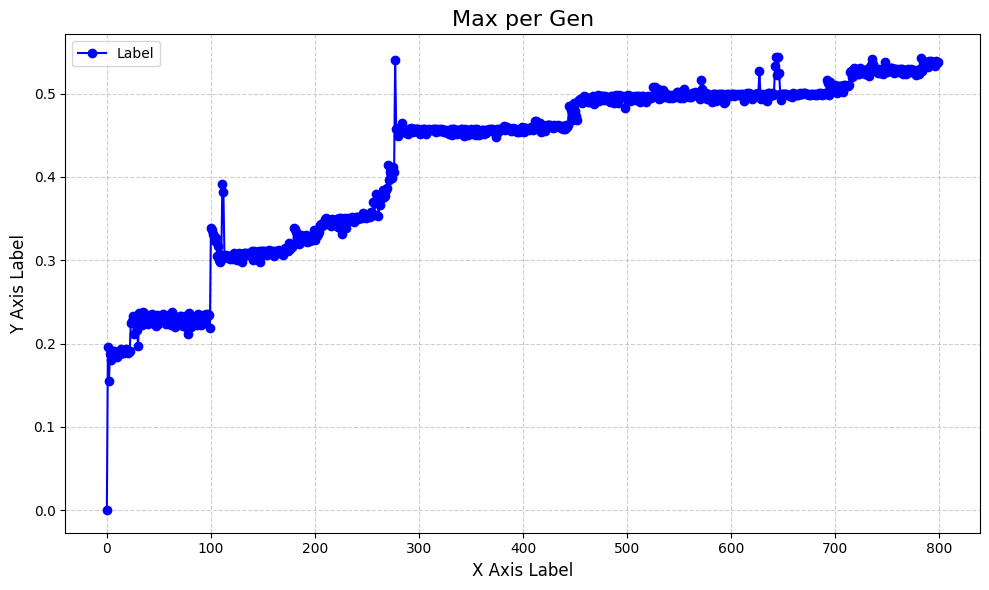

In [35]:
x_values = max_per_gen.index
y_values = max_per_gen["Fitness"]

plot_graph(x_values, y_values, "Max per Gen")

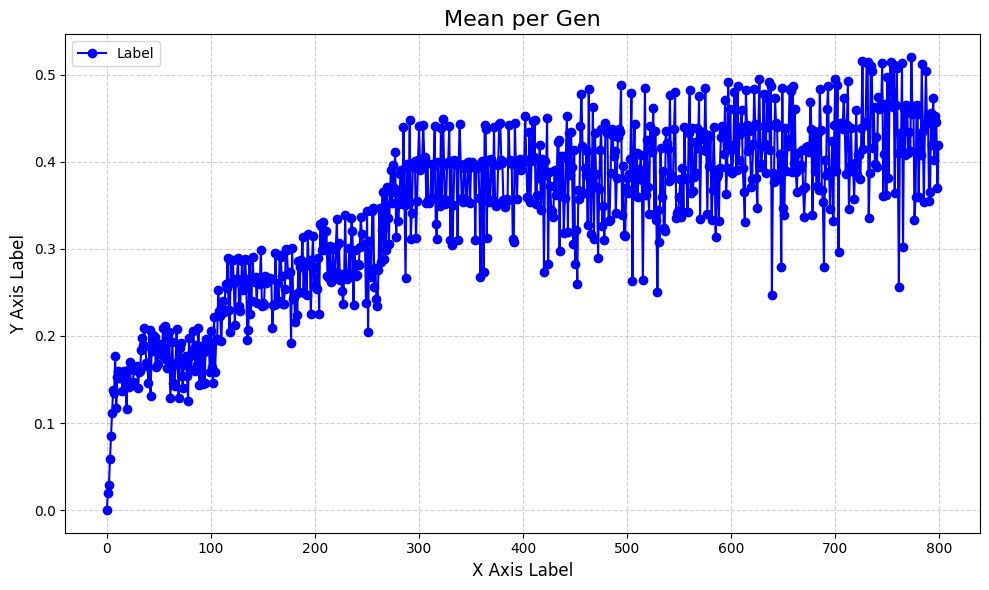

In [36]:
x_values = mean_per_gen.index
y_values = mean_per_gen["Fitness"]

plot_graph(x_values, y_values, "Mean per Gen")

0.9999988143567271
-0.9999141413048142


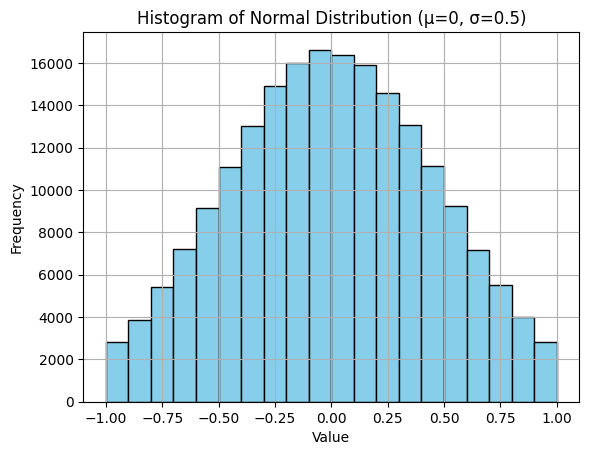

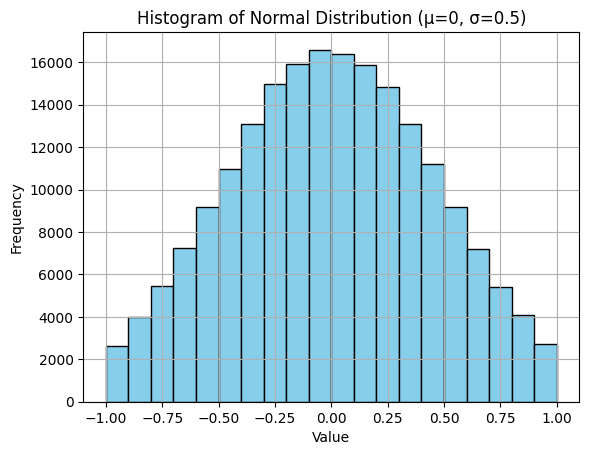

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Parameters
mu = 0
sigma = 0.5
a, b = -1, 1  # Truncate between -1 and 1

# Transform bounds to standard normal space
a_std, b_std = (a - mu) / sigma, (b - mu) / sigma

# Create truncated normal distribution
trunc_normal = truncnorm(a_std, b_std, loc=mu, scale=sigma)

# Sample
samples = trunc_normal.rvs(200000)


# Generate normally distributed data
normal_dist = []
for _ in range(200000):
    a = np.random.normal(0, 0.5)
    while a < -1 or a > 1:
        a = np.random.normal(0, 0.5)
        
    normal_dist.append(a)

print(max(samples))
print(min(samples))
# Plot histogram
plt.hist(normal_dist, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Normal Distribution (μ=0, σ=0.5)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.hist(samples, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Normal Distribution (μ=0, σ=0.5)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
